In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read pivot table
xls = pd.ExcelFile("FVS_4_1.xlsx")
df = pd.read_excel(xls, 'carbon_pivot',skiprows = 2)
# cleanup df
df.set_index("Year", inplace = True)
df.drop(df.tail(1).index,inplace=True) # drop last n rows
# set cols 
colnames = ["Base_BK","Base_HL","Base_LP","Base_WN",'SUM']
# apply cols 
df = df.set_axis(colnames, axis=1, inplace=False)
# drop sum row 
df.drop("SUM", axis = 1, inplace = True)



In [3]:
# convert AGB --> co2e
df_t = df * 0.45 * 44/12

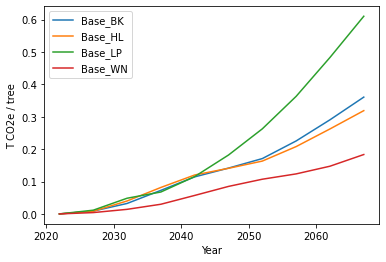

In [4]:
df_t.plot()
plt.ylabel("T CO2e / tree")
plt.show()

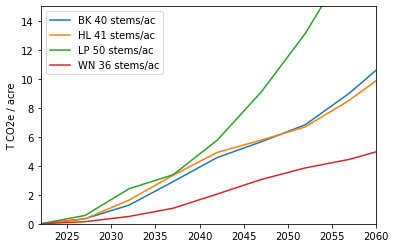

In [5]:
stems_ac = {
    "Base_BK" : 40, # guessed from VT HL
    "Base_HL" : 41, # taken from VT
    "Base_LP" : 50, # made up
    "Base_WN" : 36, # taken from VT
}

for k,v in stems_ac.items():
    plt.plot(df_t[k] * v, label = "{} {} stems/ac".format(k[-2:],v ))
    

plt.legend()
plt.ylabel("T CO2e / acre")
plt.ylim(0,15)
plt.xlim(2022,2060)

plt.show()
